# 911 Calls Capstone Project
#For this capstone project we will be analyzing some 911 call data from https://www.kaggle.com/datasets/mchirico/montcoalert. The data contains the following fields:

lat : String variable, Latitude
lng: String variable, Longitude
desc: String variable, Description of the Emergency Call
zip: String variable, Zipcode
title: String variable, Title
timeStamp: String variable, YYYY-MM-DD HH:MM:SS
twp: String variable, Township
addr: String variable, Address
e: String variable, Dummy variable (always 1)
Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Science skills!

In [1]:
import numpy as np
import pandas as pd

In [2]:
## Import Vizualization liabrary and set % matpltlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
df_call=pd.read_csv(r'C:\Users\ss186070\OneDrive - Teradata\Documents\MyDocument\Shib\Learning\Python\Practise\udemyexercise\InputOutputData\911.csv')

In [5]:
df_call.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [6]:
df_call.head()


,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [7]:
## What are top 5 zipcode call 911
df_call['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [8]:
## What are the top 5 township call 911
df_call['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [9]:
## how many unique title code present
len(df_call['title'].unique())

110

In [10]:
## Other approach to , how many unique title code present
df_call['title'].nunique()

110

In [8]:
df_call.head(20)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 17:40:01,HORSHAM,LAUREL AVE & OAKDALE AVE,1
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 17:40:01,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 17:40:01,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:01,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1


## In the title column there are reason/department specified before the title code.These are EMS, Fire,Traffic.Use 
## .apply with custome lambda function to create new column called "reason" that contained the string value.
## for example if the title column is "EMS: BACK PAINS/INJURY" then Reason column should EMS



In [14]:
df_call['Reason']=df_call['title'].apply(lambda title:title.split(':')[0])

In [15]:
df_call['Reason']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: Reason, Length: 99492, dtype: object

In [16]:
df_call.head(10)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1,EMS
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 17:40:01,HORSHAM,LAUREL AVE & OAKDALE AVE,1,EMS
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 17:40:01,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1,EMS
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 17:40:01,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1,EMS
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:01,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1,Traffic


In [17]:
## What is the most common Reason for call a 911
df_call['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

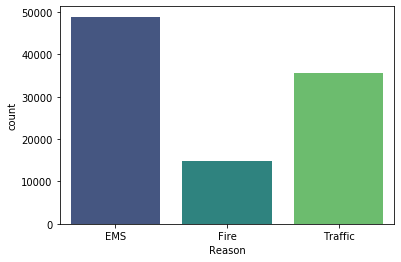

In [18]:
## Now use seaborn to create count plot of 911 calls by reason
sns.countplot(x='Reason',data=df_call,palette='viridis')

## lets us begin to focus on time information . what is the datatype of objects in timestamp column


In [19]:
df_call['timeStamp'].iloc[0] ## frist row from df_call

'2015-12-10 17:40:00'

In [20]:
type(df_call['timeStamp'].iloc[0])

str

In [22]:
## convert from string to timestamp
df_call['timeStamp']=pd.to_datetime(df_call['timeStamp'])

In [20]:
type(df_call['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [23]:
df_call['timeStamp'].iloc[0]

Timestamp('2015-12-10 17:40:00')

In [24]:
frist_row_dttm=df_call['timeStamp'].iloc[0]

In [25]:
frist_row_dttm

Timestamp('2015-12-10 17:40:00')

In [26]:
## get hour
frist_row_dttm.hour

17

In [27]:
##Get year
frist_row_dttm.year

2015

In [28]:
##Get month
frist_row_dttm.month

12

In [29]:
##day
frist_row_dttm.day

10

In [30]:
##day of week
frist_row_dttm.dayofweek

3

In [31]:
df_call['Hour']=df_call['timeStamp'].apply(lambda timeStamp:timeStamp.hour)

In [32]:
df_call['Hour']

0        17
1        17
2        17
3        17
4        17
         ..
99487    11
99488    11
99489    11
99490    11
99491    11
Name: Hour, Length: 99492, dtype: int64

In [33]:
df_call['Month']=df_call['timeStamp'].apply(lambda timeStamp:timeStamp.month)
df_call['Day of Week']=df_call['timeStamp'].apply(lambda timeStamp:timeStamp.dayofweek)

In [34]:
df_call.head(10)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,17,12,3
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 17:40:01,HORSHAM,LAUREL AVE & OAKDALE AVE,1,EMS,17,12,3
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 17:40:01,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1,EMS,17,12,3
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 17:40:01,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1,EMS,17,12,3
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:01,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1,Traffic,17,12,3


In [35]:
## how map the value of one column into another with dictionary 
week_map={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thrusday',4:'Friday',5:'Saturday',6:'Sunday'}

In [36]:
df_call['Day of Week']=df_call['Day of Week'].map(week_map)

In [37]:
df_call.head(100)


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thrusday
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thrusday
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thrusday
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thrusday
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thrusday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,40.083078,-75.101117,SHELMIRE ST & CEDAR RD; ABINGTON; 2015-12-10 @...,19027.0,Traffic: DISABLED VEHICLE -,2015-12-10 21:52:01,ABINGTON,SHELMIRE ST & CEDAR RD,1,Traffic,21,12,Thrusday
96,40.276304,-75.565024,SWAMP PIKE & SANATOGA RD; NEW HANOVER; 2015-12...,19525.0,Traffic: DISABLED VEHICLE -,2015-12-10 22:01:01,NEW HANOVER,SWAMP PIKE & SANATOGA RD,1,Traffic,22,12,Thrusday
97,40.095320,-75.193482,CHELTENHAM AVE & DELPHINE RD; SPRINGFIELD; 201...,19038.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 22:02:01,SPRINGFIELD,CHELTENHAM AVE & DELPHINE RD,1,Traffic,22,12,Thrusday
98,40.151476,-75.396624,MARK LN & IVY CIR; LOWER PROVIDENCE; Station ...,19403.0,EMS: CVA/STROKE,2015-12-10 22:07:02,LOWER PROVIDENCE,MARK LN & IVY CIR,1,EMS,22,12,Thrusday


In [38]:
df_call['Day of Week'].value_counts()

Tuesday      15150
Wednesday    14879
Friday       14833
Monday       14680
Thrusday     14478
Saturday     13336
Sunday       12136
Name: Day of Week, dtype: int64

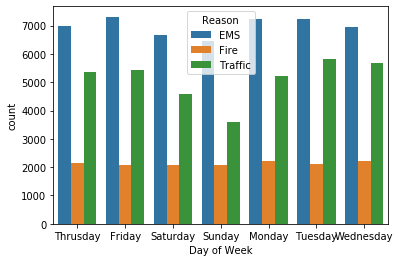

In [39]:
## Use seaborn to to create count plot of the day of week column with hue based off The reason column
sns.countplot(x='Day of Week',hue='Reason',data=df_call)

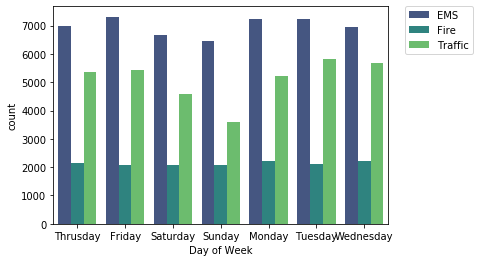

In [40]:
sns.countplot(x='Day of Week',data=df_call,hue='Reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.) ## used put legend outside the plot

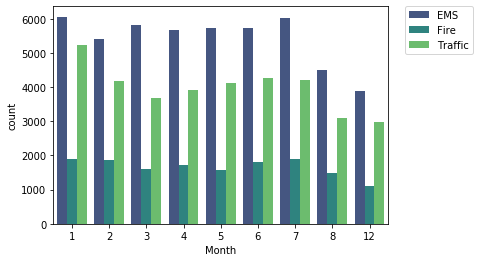

In [41]:
sns.countplot(x='Month',data=df_call,hue='Reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.) ## used put legend outside the plot

## in month here missing 9,10,11 month in below graph

In [42]:
## Create group by projectcalled month where you group by the data frame by month
## and use the count method for aggregation.use the head method on this returned data frame

byMonth=df_call.groupby('Month').count()

In [43]:
type(byMonth)

pandas.core.frame.DataFrame

In [44]:
byMonth.head(20)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


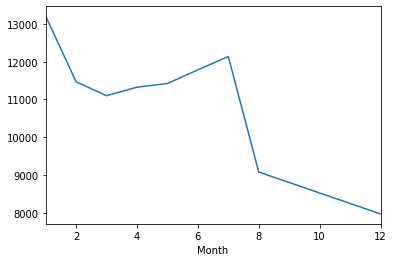

In [45]:
##Now create simple plot off the data frame indicating the count of the calls of  per month
byMonth['lat'].plot()

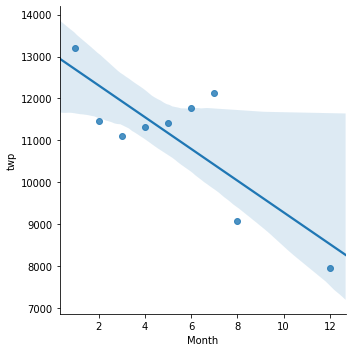

In [46]:
##Now see if you can use the seaborn's lmplot to create linear fit on the number of columns per month.
##keep in mind you may need to reset the index to a column ( it means , Month iscurrently an index in byMonth dataframe but we need to
## now need to covert into column by reset Index to plot linear model plot)
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

In [47]:
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


In [48]:
byMonth.reset_index()

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
5,6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
6,7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
7,8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
8,12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


In [49]:
##Craete new column as call_date that contains the date from timestamp column 
first_row_timstamp=df_call['timeStamp'].iloc[0]

In [50]:
first_row_timstamp

Timestamp('2015-12-10 17:40:00')

In [53]:
first_row_timstamp.date()

datetime.date(2015, 12, 10)

In [55]:
df_call['timeStamp'].apply(lambda t:t.date())

0        2015-12-10
1        2015-12-10
2        2015-12-10
3        2015-12-10
4        2015-12-10
            ...    
99487    2016-08-24
99488    2016-08-24
99489    2016-08-24
99490    2016-08-24
99491    2016-08-24
Name: timeStamp, Length: 99492, dtype: object

In [56]:
df_call['call_date']=df_call['timeStamp'].apply(lambda t:t.date())

In [57]:
df_call.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,call_date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thrusday,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thrusday,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thrusday,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thrusday,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thrusday,2015-12-10


In [59]:
## Plot the graph based on the numbers calls per a date

##Step#1 : group by the data based on call_date
df_call.groupby('call_date').count()

call_date
2015-12-10    115
2015-12-11    396
2015-12-12    403
2015-12-13    319
2015-12-14    447
             ... 
2016-08-20    328
2016-08-21    357
2016-08-22    389
2016-08-23    439
2016-08-24    132
Name: lat, Length: 259, dtype: int64

In [61]:
###step#2 : fetch the count of column which has value in all rows
df_call.groupby('call_date').count()['lat']

call_date
2015-12-10    115
2015-12-11    396
2015-12-12    403
2015-12-13    319
2015-12-14    447
             ... 
2016-08-20    328
2016-08-21    357
2016-08-22    389
2016-08-23    439
2016-08-24    132
Name: lat, Length: 259, dtype: int64

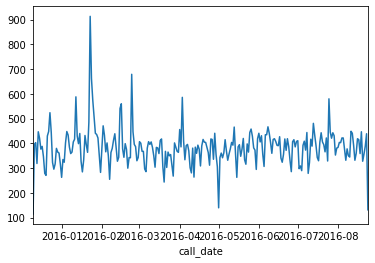

In [62]:
## Plot the graph. ## See the date value are overlapping in x-axis
df_call.groupby('call_date').count()['lat'].plot()

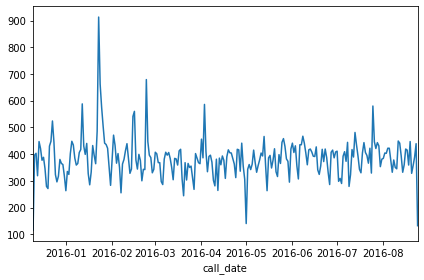

In [63]:
## Avoid overalpping in x_axis value
df_call.groupby('call_date').count()['lat'].plot()
plt.tight_layout()


## Now receate this plot but create 3 separate plots with each plot representing a reason for the 911 call


In [64]:
## what is distict value in Reason 
df_call['Reason'].unique()

array(['EMS', 'Fire', 'Traffic'], dtype=object)

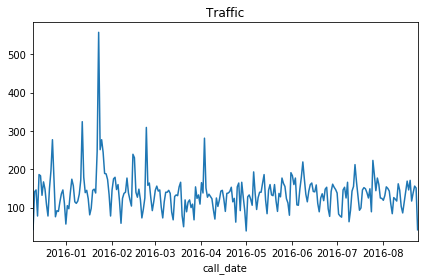

In [76]:
## Plot the graph based on Reason='Traffic'
df_call[df_call['Reason']=='Traffic'].groupby('call_date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()


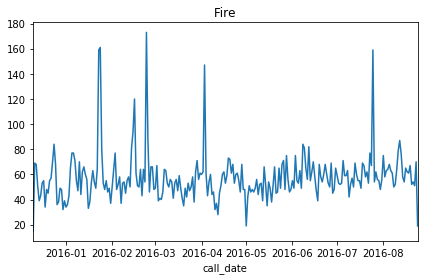

In [81]:
df_call[df_call['Reason']=='Fire'].groupby('call_date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()


In [85]:
df_call.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 14 columns):
lat            99492 non-null float64
lng            99492 non-null float64
desc           99492 non-null object
zip            86637 non-null float64
title          99492 non-null object
timeStamp      99492 non-null datetime64[ns]
twp            99449 non-null object
addr           98973 non-null object
e              99492 non-null int64
Reason         99492 non-null object
Hour           99492 non-null int64
Month          99492 non-null int64
Day of Week    99492 non-null object
call_date      99492 non-null object
dtypes: datetime64[ns](1), float64(3), int64(3), object(7)
memory usage: 10.6+ MB


Text(0.5, 1, 'EMS')

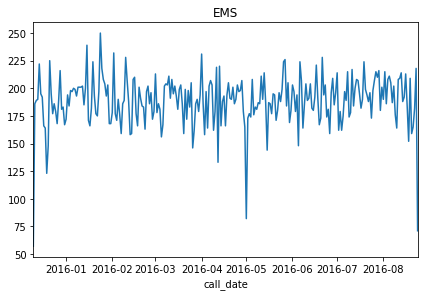

In [84]:
df_call[df_call['Reason']=='EMS'].groupby('call_date').count()['lat'].plot()
plt.tight_layout()
plt.title('EMS')

Create hitmapwith seaborn and our data .need to restructure the data frame columns become hour and index become day of week


In [97]:
## Create count of call based on hour and day of the week. group by  day of week and hour
dayHour=df_call.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()


In [99]:
dayHour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Friday,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Monday,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Saturday,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sunday,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thrusday,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tuesday,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wednesday,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


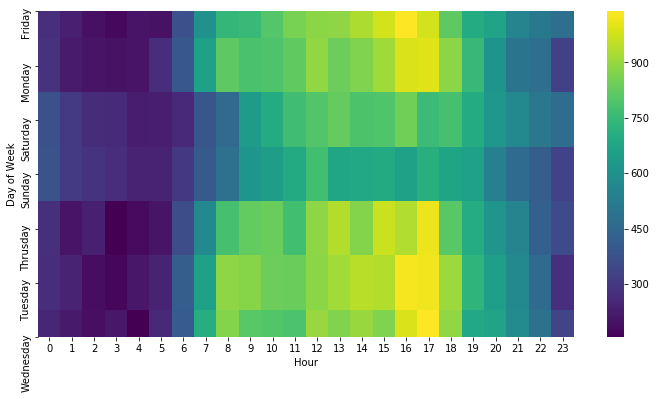

In [103]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')




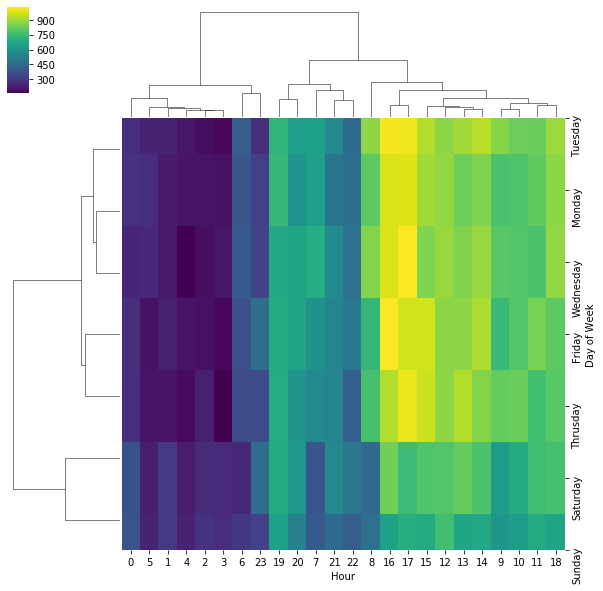

In [104]:
## Cluster Map
sns.clustermap(dayHour,cmap='viridis')

In [116]:
## Create matix on Day of week and Month. it means count the calls based on

## Group by with day of week and month
weekMonth=df_call.groupby(by=['Day of Week','Month']).count()['lat'].unstack()

In [117]:
type(weekMonth)

pandas.core.frame.DataFrame

In [118]:
weekMonth

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Friday,1970,1581,1525,1958,1730,1649,2045,1310,1065
Monday,1727,1964,1535,1598,1779,1617,1692,1511,1257
Saturday,2291,1441,1266,1734,1444,1388,1695,1099,978
Sunday,1960,1229,1102,1488,1424,1333,1672,1021,907
Thrusday,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tuesday,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wednesday,1700,1903,1889,1517,1538,2058,1717,1295,1262


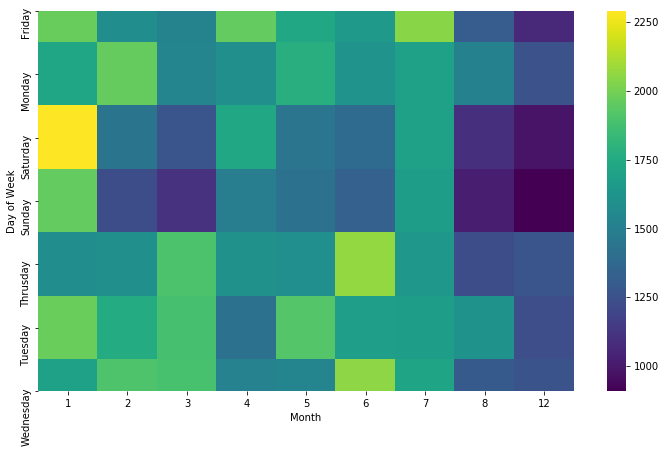

In [121]:
plt.figure(figsize=(12,7))
sns.heatmap(data=weekMonth,cmap='viridis')

<Figure size 864x504 with 0 Axes>

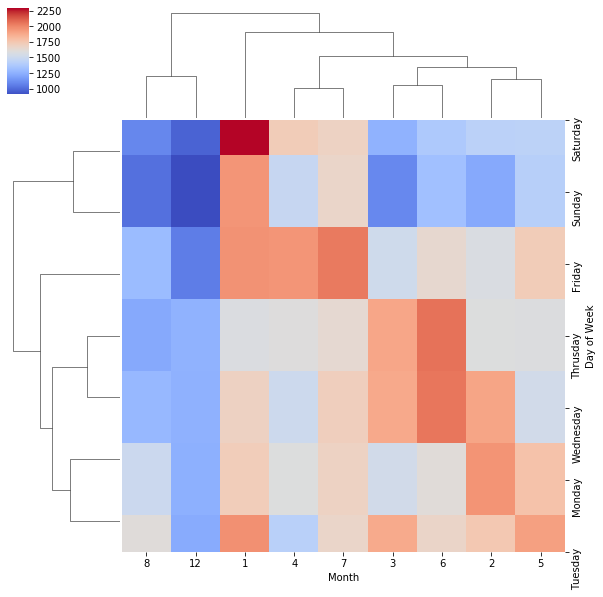

In [123]:
plt.figure(figsize=(12,7))
sns.clustermap(data=weekMonth,cmap='coolwarm')